# Goals

Good data science projects start with a clear understanding of the data and where it comes from. In this tutorial, we will use HTTP requests and BeautifulSoup to write a web scraper, and then we will use NumPy, Pandas, matplotlib, sklearn, and Jupyter notebooks to explore that data carefully.

The goal of this part of the tutorial is build your skills in: 

- asking good questions
- finding good data
- scraping a web page
- cleaning and manipulating data
- using pandas
- exploratory data visualization
- thinking about data and what features might be used to make predictions

## We're going to make a movie! 


First, we want to learn about what makes a box office hit. So to start off let's pretend that we are some (very data savvy) movie producers, and we want to make a movie that will make us a lot of money.  

<img src="https://pinnacle.topechelon.com/files/images/Pile%20of%20Money-resized-600.jpg"
     alt="Pile of money"
     style="align:center"/>


So what are some features of movies that might correlate with making a ton of money? Is it the budget? The actors

##### Example 1.  Black Panther may be a contender for best movie EVARR

<img src="http://www.nerdcoremovement.com/wp-content/uploads/Black-Panther-1-938x535.jpg"
     alt="Example Great Movie"
     style="float: left; margin-right: 10px;"/>

### Try it out!  

List some of the features that you think you might want to consider as you make you make **The Best Movie Ever**.

*type your answer here*

# Asking good questions  

### "A good question is one that you can answer."

One of the most important (but unfortunately often overlooked) skills of any data practitioner is to know their own limitations. What is a good question? What questions can we ask given the data that we have? Check out these examples.

** Not good : Vague**
 - Will my movie be a box office hit?

** OK (ask with caution) : Causal**
 - If I cast Actor X, will my movie be a box office hit? 
 
** Good : Likelihood** 
 - What is the likelihood that my movie will be a box office hit given that it has X features?

** Better : Correlation**
 - What attributes of a movie are correlated with box office success?

### Correlation does not imply causation 

While asserting that Nicolas Cage's popularity caused pool accidents is clearly silly, it's less clear if, for example, filming in one city will result in more box-office revenue than filming in another. If you need to be reminded that correlation does not imply causation, check out some of [these examples](http://www.tylervigen.com/spurious-correlations).

<img src="http://tylervigen.com/images/spurious-correlations-share.png"
     alt="Correlation is not causation"
     style="float: left; margin-right: 10px;"/>


To ask the best question you can:

1. Use your experience, research, or "educated guess" to narrow your question.
2. If it is vague, rewrite your question as a correlation.
3. Assure that you are asking one question for each of your variables.

### "But what if I really do *need* to argue for causality?"

Causality is notoriously hard to prove, but if you think that something is causal and you need to argue for causation, there are some ways to do this. This [blog post](https://statswithcats.wordpress.com/2015/01/01/how-to-tell-if-correlation-implies-causation/) outlines a few ways to start thinking about this type of argument. We won't discuss this further in this tutorial though. 

### Try it out!  

Come up with 10 questions that you would like to answer. Note whether they are vague, causal, likelihood-based, or correlation-based. If you need some examples of what we are looking for, check out [this list]().

Prepare to revise your assumptions and share a few of your examples. 

*type your answer here*

# Getting good data 

The type of data that we have has the potential to limit the types of questions that we can answer. Knowing how to access, clean, and curate good data is an essential skill for most data practioners.  

## What are some good places to get data? 

There are a lot of good places to get data! If you want to start looking at some data sets, here are a few repositories. 
   - [Kaggle](https://www.kaggle.com/datasets)  
   - [FiveThirtyEight](https://data.fivethirtyeight.com/)
   - [Government Data](https://catalog.data.gov/dataset)
   - APIs (e.g. [IMDBPy](https://imdbpy.sourceforge.io/), [Twitter](https://developer.twitter.com/en/docs/api-reference-index), etc.)
   - Scraping the Internet! 
    
### What sites should you scrape? 

When you want to find a certain type of data, try to find data that is structured (e.g. Wikipedia). Tables, headings, and text boxes stand out, and can be easier to find. **Remember to read the Terms of Service for the site that you plan to scrape.**

<img src="img/scrapingsites.png"
     alt="Example Data sources"
     style="align:center"/>

### Try it out! 

We are going to use data to make **The Best Movie Ever**, but what are some good places for us to get that data? 

*type your answer here*

## Start scraping 

To get started, we need to import several packages. We explain what several of these imports are below in the comments. 

In [6]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
from matplotlib import rcParams # special matplotlib argument for improved plots
from collections import defaultdict 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import io 
import warnings
warnings.filterwarnings('ignore')

We use [Seaborn](http://seaborn.pydata.org/) to give us a nicer default color palette, with our plots being of large (poster) size and with a white-grid background. 

### Scrape Box Office Mojo 

To get the text from the website to your local machine, we will use a GET request, which is available in the [Requests](http://docs.python-requests.org/en/master/) library. 

To get started exploring the text that you bring to your local machine, we will use [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/). If you are familiar with another scraping library like [PyQuery](https://pythonhosted.org/pyquery/) or [Scrapy](https://scrapy.org/), feel free to do this exercise using those instead (or in addition! :)). 

In [7]:
from bs4 import BeautifulSoup
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries.
import requests
import time

Here, we access a webpage and download the HTML using requests. When we make a GET response, we get an HTTP response object back. 

In [8]:
r_2018 = requests.get("http://www.boxofficemojo.com/yearly/chart/?view=releasedate&view2=domestic&page=1&yr=2018")
time.sleep(1) # sleeping is important!

You should get a HTTP response 200, which means that the request went through without issue. If you get another HTTP response, you can look it up in [this list](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) to determine what it is. 

Alternatively, if you like your HTTP status codes illustrated as cat gifs, you can look up your codes using [http.cat](https://http.cat/).

In [9]:
print r_2018

<Response [200]>


There are a lot of awesome things going in this response object. Most relevantly, it has returned all the text from the page that we made the request from to us, so we can look at it on our local machine. 

In [10]:
## uncomment the line below to see the html returned by the response 
#print r_2018.text

While this blob of text is not difficult for our computer to search through, it can be a little difficult for us to wrap human brains around. Some other ways that we can look at the text are: 

(a) Right click > View Source. 

(b) Right click > Inspect Item 

(c) View > Developer > Developer Tools 


### Try it out! 

### Understanding the HTML 

Which parts of this text do we need to get information about these movies? How can we pull out only the information that we want? 

*double-click to type your answer here*

### Try it out!

### Requests 

Scrape [Box Office Mojo's](http://www.boxofficemojo.com/yearly/chart/?yr=2018&p=1) data for movies from 2016 to 2018 and store the page text in a dictionary. **Remember to use the time(s) function to add a wait before each GET request.** 

(Optional) If you feel like you need more of a hint to get started, [check out this example](https://github.com/dhanus/scipy16-examples/blob/master/SciPyTalk_RequestsAndBeautifulSoup_Example.ipynb).

In [11]:
# Your answer here
years = xrange(2016,2018)
pages = xrange(1,9)
year_pagetxt = {}
for year in years: 
    pagestext = {}
    for page in pages: 
        r = requests.get("http://www.boxofficemojo.com/yearly/chart/?page=%s&view=releasedate&view2=domestic&yr=%s&p=.htm"%(page, year))
        pagestext[page] = r.text
        time.sleep(1)
    year_pagetxt[year] = pagestext

In [12]:
# if you do not finish this exercise, we made the result for you here.
year_pagetxt = pickle.load(io.open('pagetxt.p','rb'))

### Beautiful Soup 

Beautiful Soup makes our HTML text queryable. Once you run a command like the one below, you can think of your HTML as a tree made of nodes as shown. 

You can do things like finding every html attribute of a certain type. Look at the [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) documentation to explore some of the commands that you can make. 

> soup  ==  BeautifulSoup(page_text, "html.parser")

<img src="img/beautifulsoup.png"
     alt="Example Data sources"
     style="align:center"/>

### Try it out! 

Use BeautifulSoup to explore the text data. Store the information from the table in the dictionary with the column heading as the key and a list of values as the value. 

(Optional) If you feel like you need more of a hint to get started, [check out this example](https://github.com/dhanus/scipy16-examples/blob/master/SciPyTalk_RequestsAndBeautifulSoup_Example.ipynb).

In [13]:
# Your answer here 

# This loop cycles through the data obtained on Box Office Mojo
## And placed in a dictionary for recall later when folding in IMDb information
movie_budget = defaultdict(list) 
for year in years: 
    for page in pages: 
        soup = BeautifulSoup(year_pagetxt[year][page], "html.parser")
        rows = soup.find_all("font", attrs={'size':'2'})
           
        start = 10 
        for i in range(start,len(rows)-2):
            t = rows[i].get_text()
            if unicode('Summary of') in t: 
                break
            elif (i-start) % 9 == 0: 
                movie_budget['rank'].append(t)
            elif (i-start) % 9 == 1: 
                movie_budget['year'].append(year)
                r = '('+str(year)
                if unicode(r) in t: 
                    j = t.index(unicode(r))
                    movie_budget['title'].append(t[:j])
                else: 
                    movie_budget['title'].append(t)
            elif (i-start) % 9 == 2: 
                movie_budget['studio'].append(t)
            elif (i-start) % 9 == 3: 
                movie_budget['gross'].append(t)
            elif (i-start) % 9 == 4: 
                movie_budget['gross theaters'].append(t)
            elif (i-start) % 9 == 5: 
                movie_budget['opening'].append(t)
            elif (i-start) % 9 == 6: 
                movie_budget['opening theaters'].append(t)
            elif (i-start) % 9 == 7: 
                movie_budget['open'].append(t)
            elif (i-start) % 9 == 8: 
                movie_budget['close'].append(t)

# Exploratory Data Analysis Preview 

Before we do any fancy statistical modeling, we need to understand our data. To do this, there is no substitute for looking at our data, making some scatter plots, and getting a better idea of how the data looks. 

### Load the data

[Pandas](https://pandas.pydata.org/) is a Python library for data analysis, which heavily uses the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) structure. Here, we work with a data frame, in which each row is a movie and each column is a feature of that movie. 

In [14]:
# load a pandas dataframe
df = pd.read_pickle('df.p')
df.head()

,budget,cast,close,director,gross,mpaa,open,opening_gross,opening_theaters,rank,...,Jan-May,Dec,June-Sep,Oct-Nov,mpaa_new,PG,R,PG-13,prol_studio,Tier_2
0327597,60000000.0,None,7/2,None,75286229.0,"Rated PG for thematic elements, scary images, ...",2/6,16849640.0,2299.0,43,...,True,False,False,False,PG,True,False,False,False,True
0337692,25000000.0,None,5/24,None,92476.0,"Rated R for strong sexual content, drug use an...",5/11,56692.0,50.0,372,...,True,False,False,False,R,False,True,False,False,False
0359950,91000000.0,None,4/10,None,58236838.0,"Rated PG for some crude comments, language and...",12/25,12765508.0,2909.0,60,...,False,True,False,False,PG,True,False,False,True,False
0361748,70000000.0,None,12/17,None,120540719.0,"Rated R for strong graphic violence, language ...",8/21,38054676.0,3165.0,25,...,False,False,True,False,R,False,True,False,False,False
0362478,25000000.0,None,1/7,None,15051977.0,"Rated PG-13 for thematic elements, some violen...",11/6,7571417.0,2635.0,125,...,False,False,False,True,PG-13,False,False,True,True,False


In [15]:
df.keys()

Index([          u'budget',             u'cast',            u'close',
               u'director',            u'gross',             u'mpaa',
                   u'open',    u'opening_gross', u'opening_theaters',
                   u'rank',           u'rating',           u'season',
                 u'studio',            u'title',             u'year',
                u'Jan-May',              u'Dec',         u'June-Sep',
                u'Oct-Nov',         u'mpaa_new',               u'PG',
                      u'R',            u'PG-13',      u'prol_studio',
                 u'Tier_2'],
      dtype='object')

### Some Features to Explore 

- **Movie Budget**
- **Opening Weekend**
- **Opening Theaters**
- **IMDb rating**
- **Seasonality**
- **MPAA Rating**
- **Power Studios**

## Example correlation plots 

Remember, the goal of all of this data analysis is to make a ton of money, so it might make sense to see how each of these factors correlate with **gross revenue**. 

### Linear regression 

One nice way of exploring how two variables look in relationship to one another is to make a regression plot. A nice explanation of linear regression can be found [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html). Most data analysis tools have some way of doing linear regression. In this tutorial, we will use the [seaborn regplot](https://seaborn.pydata.org/tutorial/regression.html) to plot regressions.  

#### Gross Revenue vs. Opening Weekend Revenue

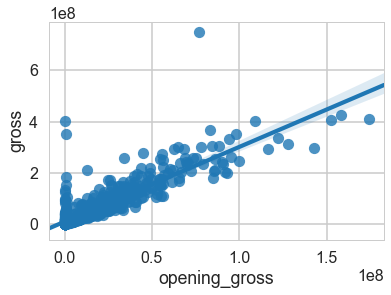

In [16]:
sns.regplot(y="gross", x="opening_gross", data=df, fit_reg = True)

### What does this plot tell us? 

*your answer here*

#### Gross Revenue vs. Opening Theaters

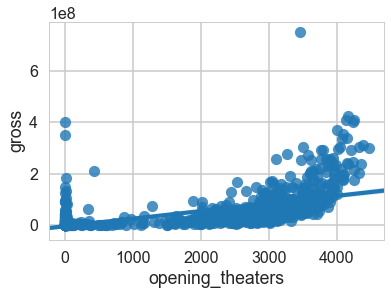

In [17]:
# your answer here 
sns.regplot(y="gross", x="opening_theaters", data=df, fit_reg = True)

### What does this plot tell us? 

*your answer here*

#### Gross Revenue vs Allocated Budget 

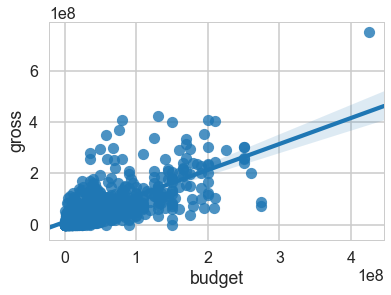

In [18]:
# your answer here 
sns.regplot(y="gross", x="budget", data=df, fit_reg = True)

### What does this plot tell us? 

*your answer here*

#### Gross revenue vs IMDB rating 

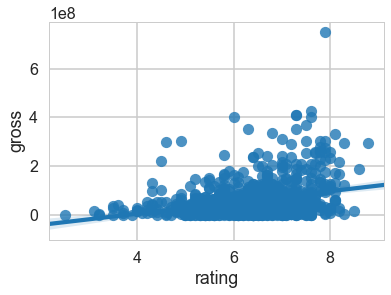

In [19]:
# your answer here 
sns.regplot(y="gross", x="rating", data=df, fit_reg = True)

### What does this plot tell us? 

*your answer here*

### Bonus: What other features? 

There is always more to explore and discover in the data. Is there anything else that you wish that we had explored together? If so, feel free to try it out now! 

If you find yourself feeling stuck, you can check out [oscarpredictor.github.io](http://oscarpredictor.github.io/) for inspiration. 